# Лабораторная работа № 2
**«Корреляция и автокорреляция. Свёртка»**

Цель работы: знакомство с корреляцией, автокорреляцией и свёрткой сигналов, а также способами их вычисления на языке Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Корреляция

Построим графики заданного сигнала в аналоговой, дискретной и квантованной форме.

**Листинг 1. Нахождение корреляции сигнала с самим собой**

Сигнал x: [1 2 3 4 3 6 1]
Корреляция x с самим собой: [ 1  8 18 32 47 56 76 56 47 32 18  8  1]


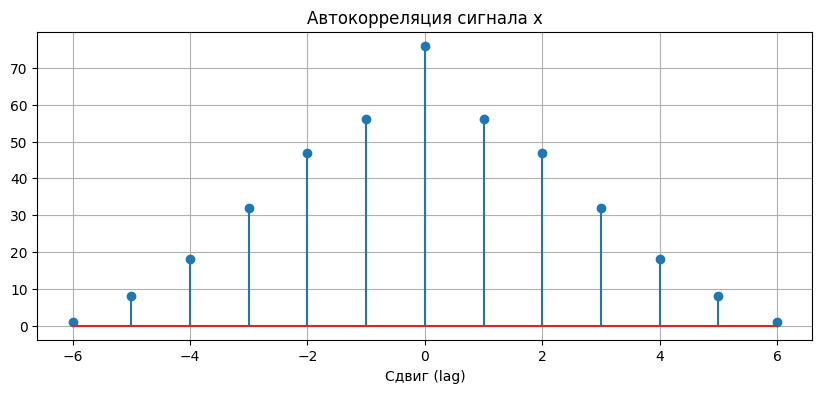

In [2]:
x = np.array([1, 2, 3, 4, 3, 6, 1])
r = np.correlate(x, x, mode='full')
print("Сигнал x:", x)
print("Корреляция x с самим собой:", r)

plt.figure(figsize=(10, 4))
plt.stem(range(-len(x)+1, len(x)), r)
plt.title('Автокорреляция сигнала x')
plt.xlabel('Сдвиг (lag)')
plt.grid(True)
plt.show()

Корреляцию можно вычислить по формуле как сумму произведений сдвинутых отсчётов.

**Листинг 2. Нахождение корреляции по формуле**

In [3]:
N = len(x)
r_manual = np.zeros(2 * N - 1)

for j in range(-N + 1, N):
    sum_val = 0
    for n in range(N):
        if 0 <= n - j < N:
            sum_val += x[n] * x[n - j]
    r_manual[j + N - 1] = sum_val

print("Корреляция по формуле:", r_manual)

Корреляция по формуле: [ 1.  8. 18. 32. 47. 56. 76. 56. 47. 32. 18.  8.  1.]


Рассмотрим пример отрицательной корреляции, когда увеличение одной переменной связано с уменьшением другой.

**Листинг 3. Отрицательная корреляция**

In [4]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([-1, -2, -3, -4, -5]) # Сигналы направлены в разные стороны

r_neg = np.correlate(x1, x2, mode='full')
print("Сигнал 1:", x1)
print("Сигнал 2:", x2)
print("Отрицательная взаимная корреляция:", r_neg)

Сигнал 1: [1 2 3 4 5]
Сигнал 2: [-1 -2 -3 -4 -5]
Отрицательная взаимная корреляция: [ -5 -14 -26 -40 -55 -40 -26 -14  -5]


Случайные процессы могут обладать нулевой корреляцией. Их взаимная сумма произведений стремится к нулю.

**Листинг 4. Случайные процессы с нулевой корреляцией**

Максимальное значение корреляции:  1165


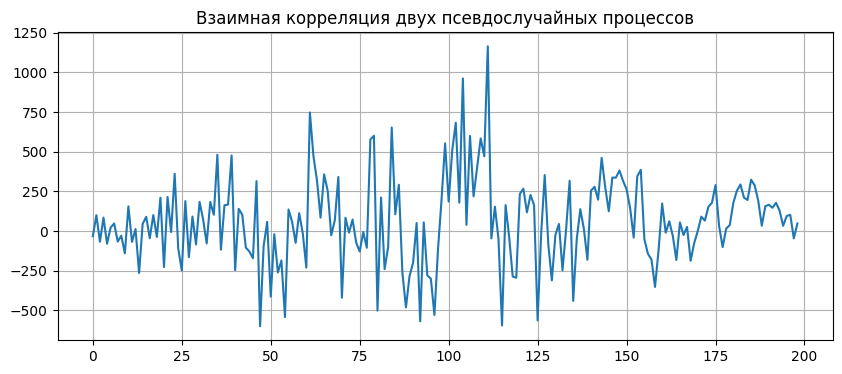

In [5]:
np.random.seed(42) # Задаем seed для воспроизводимости
x_rand1 = np.random.randint(-10, 10, 100)
x_rand2 = np.random.randint(-10, 10, 100)

r_rand = np.correlate(x_rand1, x_rand2, mode='full')
print("Максимальное значение корреляции: ", np.max(r_rand))

plt.figure(figsize=(10, 4))
plt.plot(r_rand)
plt.title('Взаимная корреляция двух псевдослучайных процессов')
plt.grid(True)
plt.show()

Дельта-функция δ(n) равна единице при n = 0 и нулю при всех остальных значениях n. С её помощью можно находить значение сигнала в заданный момент времени (фильтрующее свойство).

**Листинг 5. Нахождение значения сигнала при помощи δ-функции**

In [6]:
x_signal = np.array([1, 5, 2, 8, 4, 9, 3, 7])
delta = np.zeros_like(x_signal)
delta[5] = 1 # Импульс в n=5

r_delta = np.correlate(x_signal, delta, mode='full')
max_corr = np.max(r_delta)

print("Сигнал x:", x_signal)
print("Дельта-функция:", delta)
print("Взаимная корреляция:", r_delta)
print("Максимальное значение корреляции r:", max_corr)
print("Значение сигнала x[5]:", x_signal[5])
print("Сравнение r_delta и x[5]: Совпадают" if max_corr == x_signal[5] else "Не совпадают")

Сигнал x: [1 5 2 8 4 9 3 7]
Дельта-функция: [0 0 0 0 0 1 0 0]
Взаимная корреляция: [0 0 1 5 2 8 4 9 3 7 0 0 0 0 0]
Максимальное значение корреляции r: 9
Значение сигнала x[5]: 9
Сравнение r_delta и x[5]: Совпадают


## Свёртка

Свёртка описывает взаимодействие сигналов между собой. Вычисление свёртки — итеративный процесс, в котором сигналы сдвигают друг относительно друга, затем перемножают и складывают.

**Листинг 6. Вычисление линейной свёртки вручную**
Пример:
`a = [1, 2, 3, 4], N = 4`
`b = [3, 2, 1], M = 3`

In [7]:
a = np.array([1, 2, 3, 4])
b = np.array([3, 2, 1])
N = len(a)
M = len(b)

# 1. Дополняем нулями слева первый сигнал до длины N+M-1.
an = np.pad(a, (M - 1, 0))

# 2-3. Инвертируем во времени второй сигнал и дополняем нулями справа.
bn_inv = b[::-1]
bn = np.pad(bn_inv, (0, N - 1))

conv_len = N + M - 1
s_manual = np.zeros(conv_len)

print("Шаги вычисления линейной свёртки:")
for i in range(conv_len):
    # 4. Сдвигаем второй сигнал вправо
    bn_shifted = np.roll(bn, i)
    # Зануляем "перебежавшие" элементы, чтобы сдвиг был линейным, а не циклическим
    bn_shifted[:i] = 0
    
    # 5. Вычисляем сумму произведений
    s_manual[i] = np.sum(an * bn_shifted)
    print(f"Шаг {i+1}: an={an}, bn={bn_shifted}, sum={int(s_manual[i])}")

print("\nЛинейная свёртка вручную:", s_manual.astype(int))

Шаги вычисления линейной свёртки:
Шаг 1: an=[0 0 1 2 3 4], bn=[1 2 3 0 0 0], sum=3
Шаг 2: an=[0 0 1 2 3 4], bn=[0 1 2 3 0 0], sum=8
Шаг 3: an=[0 0 1 2 3 4], bn=[0 0 1 2 3 0], sum=14
Шаг 4: an=[0 0 1 2 3 4], bn=[0 0 0 1 2 3], sum=20
Шаг 5: an=[0 0 1 2 3 4], bn=[0 0 0 0 1 2], sum=11
Шаг 6: an=[0 0 1 2 3 4], bn=[0 0 0 0 0 1], sum=4

Линейная свёртка вручную: [ 3  8 14 20 11  4]


Проверим результат вычисления линейной свёртки с помощью встроенной функции `numpy.convolve`.

**Листинг 7. Вычисление линейной свёртки с помощью numpy.convolve**

In [8]:
s_np = np.convolve(a, b, mode='full')
print("Линейная свёртка numpy.convolve:", s_np)
print("Результаты совпадают?", np.array_equal(s_manual, s_np))

Линейная свёртка numpy.convolve: [ 3  8 14 20 11  4]
Результаты совпадают? True


Циклическая свёртка применяется к сигналам одинаковой длины, при этом один из сигналов сдвигается по кругу.

**Листинг 8. Вычисление циклической свёртки вручную**
Пример:
`a = [1, 2, 3, 4]`
`b = [3, 2, 1, 0]`

In [9]:
a_circ = np.array([1, 2, 3, 4])
b_circ = np.array([3, 2, 1, 0])
N = len(a_circ)

# 1. Инвертируем второй сигнал циклически
# [3, 2, 1, 0] превращается в [3, 0, 1, 2]
b_inv = np.zeros(N, dtype=int)
b_inv[0] = b_circ[0]
for i in range(1, N):
    b_inv[i] = b_circ[N - i]

s_cyclic = np.zeros(N)

print("Шаги вычисления циклической свёртки:")
for i in range(N):
    # 2. Сдвигаем второй сигнал вправо циклически
    b_shifted = np.roll(b_inv, i)
    
    # 3. Сумма произведений
    s_cyclic[i] = np.sum(a_circ * b_shifted)
    print(f"Шаг {i+1}: a={a_circ}, b={b_shifted}, sum={int(s_cyclic[i])}")

print("\nЦиклическая свёртка вручную:", s_cyclic.astype(int))

Шаги вычисления циклической свёртки:
Шаг 1: a=[1 2 3 4], b=[3 0 1 2], sum=14
Шаг 2: a=[1 2 3 4], b=[2 3 0 1], sum=12
Шаг 3: a=[1 2 3 4], b=[1 2 3 0], sum=14
Шаг 4: a=[1 2 3 4], b=[0 1 2 3], sum=20

Циклическая свёртка вручную: [14 12 14 20]


В связи с отсутствием встроенной функции для циклической свёртки в NumPy используем свойство преобразования Фурье: свёртка во временной области равна произведению спектров в частотной области.

**Листинг 9. Вычисление циклической свёртки с помощью БПФ (numpy.fft)**

In [10]:
# Свёртка во временной области = произведение спектров в частотной
A = np.fft.fft(a_circ)
B = np.fft.fft(b_circ)

S = A * B
s_fft = np.fft.ifft(S)

# Берем действительную часть и округляем до целых
s_fft_real = np.real(s_fft).round().astype(int)

print("Циклическая свёртка через БПФ:", s_fft_real)
print("Совпадает с ручным алгоритмом?", np.array_equal(s_cyclic, s_fft_real))

Циклическая свёртка через БПФ: [14 12 14 20]
Совпадает с ручным алгоритмом? True


## Контрольные вопросы

1. **Что такое корреляция?**
   Корреляция показывает степень линейной зависимости или похожести между двумя сигналами. 

2. **В каком случае корреляция бывает положительной, а в каком отрицательной?**
   При положительной корреляции увеличение одной переменной взаимосвязано с увеличением другой. При отрицательной — увеличение одной переменной связано с уменьшением другой.

3. **Может ли корреляция быть равна нулю?**
   Да, если сигналы абсолютно независимы или ортогональны друг другу. Их сумма произведений при этом стремится к нулю.

4. **Как вычислить взаимную корреляцию двух последовательностей данных, содержащих по N элементов?**
   Как нормированную сумму произведений отсчетов с учетом временного сдвига (задержки одного сигнала относительно другого).

5. **Что такое автокорреляционная функция?**
   Это зависимость взаимосвязи (корреляции) между функцией (сигналом) и её сдвинутой копией от величины временного сдвига. Физический смысл АКФ в нуле означает энергию сигнала.

6. **Что такое свёртка?**
   Это математическая операция, которая при применении к двум функциям возвращает третью, показывающую схожесть одной функции с отражённой и сдвинутой копией другой. В обработке сигналов она показывает прохождение сигнала через линейную систему (фильтр).

7. **Что такое импульсная характеристика?**
   Это реакция системы (цепи, фильтра) на входное воздействие в виде функции Дирака (единичного импульса).

8. **Чем отличается линейная свёртка от циклической?**
   В линейной свёртке последовательности могут иметь разную длину, и длина результата больше длин исходных сигналов ($N+M-1$). В циклической свёртке входные сигналы имеют одинаковую длительность $N$, и результат имеет такую же длину.

9. **Какая функция NumPy вычисляет значения взаимнокорреляционной двух функций?**
   Функция `numpy.correlate`.

10. **Какая функция NumPy вычисляет значения линейной свёртки двух функций?**
    Функция `numpy.convolve`.

11. **Какими двумя способами можно вычислить циклическую свёртку с использованием языка Python и библиотеки NumPy?**
    Прямым способом через цикл с пошаговым циклическим сдвигом массива (`np.roll`), либо через Быстрое преобразование Фурье (БПФ) с помощью библиотеки `numpy.fft` (`np.fft.ifft(np.fft.fft(a) * np.fft.fft(b))`).